In [1]:
%config Completer.use_jedi = False

In [3]:
import pandas as pd
import tqdm
import re

from konlpy.corpus import kolaw
from konlpy.tag import Okt, Hannanum, Kkma, Komoran, Twitter, Mecab
# import MeCab
from konlpy.utils import concordance, pprint

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글깨짐 설정
import matplotlib.font_manager as fm

# print(fm.findSystemFonts(fontpaths=None, fontext='ttf'))
# font_location = '/usr/share/fonts/truetype/NanumGothic.ttf'  #font 경로 설정
# font_name = fm.FontProperties(fname=font_location).get_name()
# plt.rc('font', family=font_name)
# plt.rc('font', size=12)        # 기본 폰트 크기

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
# df = pd.read_csv('novel_story_sep.csv', lineterminator='\n')
df = pd.read_csv('../Data/novel.csv', on_bad_lines='skip')

In [25]:
df

,id,itemId,title,pubDate,coverSmallUrl,coverLargeUrl,publisher,priceStandard,customerReviewRank,author,isbn,link,story,review,piece,modification_time,insertion_time
0,1,349572433,주술회전 1: 떠나가는 여름과 돌아오는 가을,20210525,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,서울미디어코믹스(서울문화사),7800,0.0,Gege Akutami(아쿠타미 제제),9791136734518,http://book.interpark.com/blog/integration/pro...,"대인기 다크 액션 판타지, 「주술회전」소설 1권 발행!!이타도리와 후시구로의 아키하...",NaN,NaN,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z
1,2,348109712,흐르는 강물처럼(40주년 기념판),20210415,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,연암서가,15000,0.0,노먼 매클린,9791160870763,http://book.interpark.com/blog/integration/pro...,영화 〈흐르는 강물처럼〉의 원작소설영화보다 더한 감동이 굽이쳐 흐른다! 〈흐르는 강...,NaN,나는 1981년 몬태나 주를 방문하던 중에 내 친구 토머스 맥구언과 함께 미국 서부...,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z
2,3,340692027,백작가의 비밀스런 시녀님 세트,20201027,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,필프리미엄에디션,38000,8.0,백주아,9791165655778,http://book.interpark.com/blog/integration/pro...,백주아 장편소설 『백작가의 비밀스런 시녀님 세트』. 가난한 소작농의 딸 폴라. 우연...,〈1권〉가난한 소작농의 딸 폴라.우연한 계기로 명망 높은 벨루니타 백작가의 사용인으...,NaN,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z
3,4,343464716,신세계에서 2,20201125,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,해냄출판사,18000,9.9,기시 유스케(貴志祐介),9788965740322,http://book.interpark.com/blog/integration/pro...,일본 SF대상 수상작 & 서점대상 제6위미래의 가상세계에 빗대어 현 인류의 모순을 ...,"순백의 아이들이 평화롭게 살아가는 머나먼 미래, 그 아름다운 유토피아에 가려진 잔혹...",X. 얼굴 없는 소년. 누구보다 사랑했던 소년. 그런데 지금은 얼굴도 떠올릴 수 없...,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z
4,5,340768143,추리소설가의 살인사건,20201028,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,소미미디어,15800,9.5,히가시노 게이고(東野圭吾),9791166111983,http://book.interpark.com/blog/integration/pro...,"추리 소설가, 편집자, 독자가 등장하는 추리소설,히가시노 게이고만이 쓸 수 있는 색...","이 작품집, 꽤나 웃기다! 한 번 읽기 시작했다면 멈출 수 없다! 올해의 페이지 터...",그것은 하마사키 회계사무소에서 온 서류였다. 소장인 하마사키 고로는 내 고등학교 동...,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,1114,345966624,어니언 마말레이드 2,20210121,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,동아,12800,0.0,백서하,9791163024453,http://book.interpark.com/blog/integration/pro...,"사랑에 빠진 위그의 뒤통수를 치고,이디에트 가문의 약점을 손에 쥐게 된 비비안. “...",NaN,“상속법 관련 문제에 대해 의견을 묻고 싶네.”“죄송하지만 그 부분에 대해서는 귀족...,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z
1065,1115,343789806,갑의 품격 1,20201130,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,가연,14500,0.0,김나든,9788968970818,http://book.interpark.com/blog/integration/pro...,"네이버 시리즈 다운로드 수 84만, 실시간 랭킹 1위.혜성처럼 나타난 김나든 작가의...","서울의 끝자락 판자촌 태생, 부모가 누군지도 모르는 고아. 보육원을 떠돌던 예일은 ...","생전 처음 보는 사람 앞에서 그렇게 예일은 펑펑 울었다. 산발이 된 머리도, 그에게...",2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z
1066,1116,342291271,진실에 갇힌 남자,20201109,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,북로드,14800,9.5,데이비드 발다치,9791158791490,http://book.interpark.com/blog/integration/pro...,“진실이 늘 우리를 자유롭게 하는 것은 아니에요.때론 우리를 가두는 감옥이 될 수도...,"죽음을 눈앞에 두고 자신의 무죄를 주장하던 남자, 이미 죽은 것이나 다름없는 그가 ...","데커는 언젠가 땅 밑에 누워 있는 가족에게 자신도 합류하게 될 그날까지, 매년 몰리...",2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z
1067,1117,342332559,검사 김서진 4,20201008,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,로크미디어,8000,0.0,이해날,9791135485893,http://book.interpark.com/blog/integration/pro...,No방심 작가 이해날의 검사물 리턴즈!그 검사의 목숨을 건 외줄 타기가 시작된다! ...,NaN,NaN,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z


In [26]:
# 불용어 저장 리스트
stopwords = set()

---

# 형태소 분리

In [8]:
text = df['story'][20][:70]
text

'사유가 만들어낸 의미의 집적, 주체하기 어려운 격정그 위에 그려진묵직하고 충격적인 세계새로운 소설의 등장!작가는 광인이거나 천'

## 1. Okt

In [9]:
okt = Okt()
story_okt = okt.morphs(text)
print(story_okt)

['사유', '가', '만들어', '낸', '의미', '의', '집', '적', ',', '주체', '하기', '어려운', '격정', '그', '위', '에', '그려진', '묵직하고', '충격', '적', '인', '세계', '새로운', '소설', '의', '등장', '!', '작가', '는', '광', '인', '이', '거나', '천']


## 2. Hannanum

In [10]:
hannanum = Hannanum()
story_hannanum = hannanum.morphs(text)
print(story_hannanum)

['사유', '가', '만들', '어', '내', 'ㄴ', '의미', '의', '집적', ',', '주체', '하', '기', '어렵', '은', '격정그', '위', '에', '그려진묵직하', '이', '고', '충격적', '이', 'ㄴ', '세계새', '롭', '은', '소설', '의', '등장', '!', '작', '가는', '광인', '이', '거나', '천']


## 3. Kkma

In [11]:
kkma = Kkma()
story_kkma = kkma.morphs(text)
print(story_kkma)

['사유', '가', '만들', '어', '내', 'ㄴ', '의미', '의', '집적', ',', '주체', '하', '기', '어렵', 'ㄴ', '격정', '그', '위', '에', '그려지', 'ㄴ', '묵직', '하', '고', '충격적', '이', 'ㄴ', '세계', '새', '롭', 'ㄴ', '소설', '의', '등장', '!', '작가', '는', '광인', '이', '거나', '천']


## 4. Komoran

In [12]:
komoran = Komoran()
story_komoran = komoran.morphs(text)
print(story_komoran)

['사유', '가', '만들', '어', '내', 'ㄴ', '의미', '의', '집', '적', ',', '주체', '하', '기', '어렵', 'ㄴ', '격정', '그', '위', '에', '그리', '어', '진', '묵직', '하', '고', '충격', '적', '이', 'ㄴ', '세계', '새롭', 'ㄴ', '소설', '의', '등장', '!', '작가', '는', '광', '인', '이', '거나', '천']


## 5. Twitter

In [13]:
twitter = Twitter()
story_twitter = twitter.morphs(text)
print(story_twitter[:50])

['사유', '가', '만들어', '낸', '의미', '의', '집', '적', ',', '주체', '하기', '어려운', '격정', '그', '위', '에', '그려진', '묵직하고', '충격', '적', '인', '세계', '새로운', '소설', '의', '등장', '!', '작가', '는', '광', '인', '이', '거나', '천']


## 6. MeCab

In [14]:
mecab = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ko-dic')

In [15]:
mecab_text = mecab.parse(text).split()
for idx,txt in enumerate(mecab_text):
    if idx % 2 == 0 and idx != len(mecab_text)-1:
        print(txt, end =', ')

사유, 가, 만들, 어, 낸, 의미, 의, 집, 적, ,, 주체, 하, 기, 어려운, 격정, 그, 위, 에, 그려진, 묵직, 하, 고, 충격, 적, 인, 세계, 새로운, 소설, 의, 등장, !, 작가, 는, 광인, 이, 거나, 천, 

---

# Okt로 형태소 분리

In [27]:
story = df['story']
review = df['review']

#### 소설 스토리가 중복되어 있는 경우는 제거 = 집합 자료형 이용해서 중복된 것은 생기지 않도록 만들었음

In [17]:
all_words = set()
for s in story:
    okt = Okt()
    story_sep = okt.pos(s)
    all_words.add(tuple(story_sep))
len(all_words)

1114

### 단어 분포 파악을 위한 데이터 프레임 생성

In [18]:
necessary_words = []
necessary_type = ('Noun', 'Verb', 'Adjective')
for idx, all_word in enumerate(all_words):
    for word,typ in all_word:
        if typ in necessary_type and word not in stopwords:
            necessary_words.append([idx, word, typ])
len(necessary_words)

165002

* words_df columns : 문서No. / 분리된 형태소(단어) / 형태(명사,형용사,동사)

In [19]:
words_df = pd.DataFrame(data = necessary_words, columns=['docNo', 'word', 'type'])

In [20]:
words_df

,docNo,word,type
0,0,웹소설,Noun
1,0,전설,Noun
2,0,된,Verb
3,0,윤이수,Noun
4,0,궁,Noun
...,...,...,...
164997,1113,청춘,Noun
164998,1113,담백하고,Adjective
164999,1113,따듯,Verb
165000,1113,위로,Noun


---

## 형태소 분리한 데이터 살펴보기

### 문서별 단어 개수 히스토그램

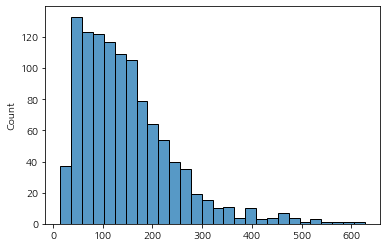

In [21]:
sns.histplot(words_df.value_counts('docNo'))
plt.show()                    

단어 수가 20\~40개인 경우가 가장 많았고, 단어수 20\~180개인 경우가 약 40%를 차지함.

#### 단어 개수 분포 (상위 25개)

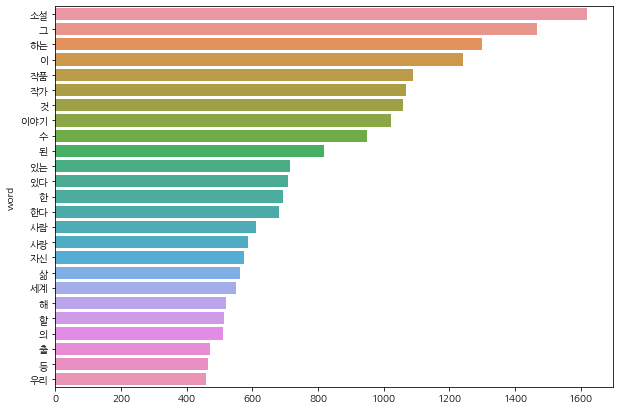

In [22]:
fre_words = words_df.value_counts('word')[:25]
plt.figure(figsize=(10,7))
sns.barplot(y=fre_words.index,x=fre_words)
plt.show()

단어 개수가 가장 많은 '소설', '그', '하는', '이', '작품' 등 Topic 분류 작업시 감성이나 장르에 따라 구분되지 않는 단어들 상당수.

### 형태소 type별 단어 빈도수 시각화

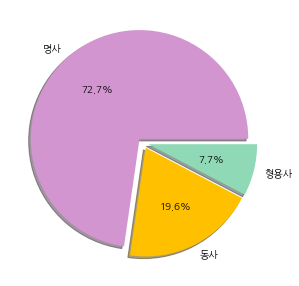

In [23]:
Noun = words_df[words_df['type'] == 'Noun']
Verb = words_df[words_df['type'] == 'Verb']
Adjective = words_df[words_df['type'] == 'Adjective']

plt.figure(figsize=(5, 5))
explode = [0.05, 0.05, 0.05]
colors = ['#d395d0', '#ffc000', '#8fd9b6']
plt.pie((len(Noun), len(Verb), len(Adjective)), labels=('명사', '동사', '형용사'), autopct='%.1f%%',  explode=explode, colors=colors, shadow=True)
plt.show()

명사형이 72.7%로 상당수

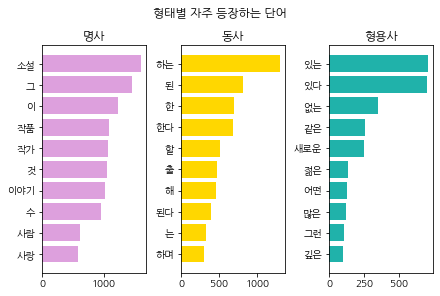

In [24]:
fig, axs = plt.subplots(1,3,constrained_layout=True)

fig.suptitle('형태별 자주 등장하는 단어')
                        
Noun_fre_words = Noun.value_counts('word')[:10]
axs[0].barh(Noun_fre_words.index[::-1],Noun_fre_words[::-1],color='plum')
axs[0].set_title('명사')

Verb_fre_words = Verb.value_counts('word')[:10]
axs[1].barh(Verb_fre_words.index[::-1],Verb_fre_words[::-1],color='gold')
axs[1].set_title('동사')

Adjective_fre_words = Adjective.value_counts('word')[:10]
axs[2].barh(Adjective_fre_words.index[::-1],Adjective_fre_words[::-1],color='lightseagreen')
axs[2].set_title('형용사')

plt.show()

### wordcloud 이용해서 단어 살펴보기

In [25]:
from wordcloud import WordCloud
#, STOPWORDS #stopwords = set(STOPWORDS) 

def show_wordcloud(data): 
    wordcloud = WordCloud(
        font_path = r'/usr/share/fonts/truetype/NanumGothic.ttf', #글자가 깨져서 폰트 파일의 주소를 할당해 주었다. 
                          background_color='white', 
                          #stopwords=stopwords, 
                          max_words=100, 
                          max_font_size=30, 
                          scale=3, 
                          random_state=1) 
    
    wordcloud=wordcloud.generate(str(data)) 
    
    fig = plt.figure(1, figsize=(12, 12)) 
    plt.rcParams['font.family'] = 'NanumGothic' 
    plt.axis('off') 
    
    plt.imshow(wordcloud) 
    plt.show() 

### 명사 자세하게 살펴보기

In [26]:
Noun_count_df = pd.DataFrame(Noun.value_counts('word'))
Noun_count_df.reset_index(inplace=True)
Noun_count_df.rename({0:'count'}, axis=1, inplace=True)
Noun_count_df.head(5)

,word,count
0,소설,1618
1,그,1467
2,이,1242
3,작품,1089
4,작가,1067


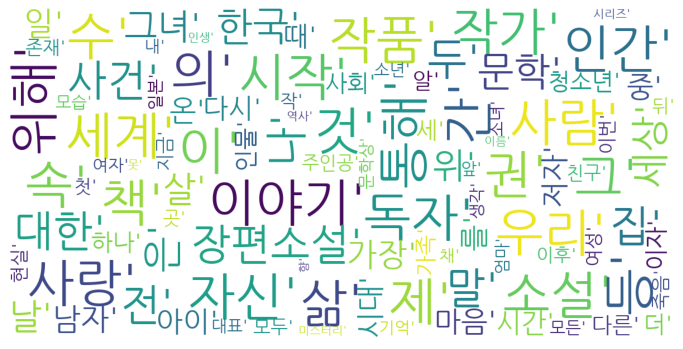

In [27]:
Noun_count = Noun_count_df['count']
Noun_most = list(Noun_count_df['word'])
    
show_wordcloud(Noun_most)

In [28]:
print(list(Noun_count_df.word[:100]))
stopwords.update(('소설', '그', '이', '작품', '작가', '것', '이야기', '수', '의', '등', '우리', '독자', '간', '책', 
                  '제', '속', '통해', '권', '위해', '장편소설', '두', '전', '대한', '은', '위', '가장', '저자', '를', '온',
                 '중', '때', '다시', '더', '하나', '이자', '세', '인물', '다른', '알', '이후', '첫', '곳', '뒤', '작', 
                 '지금', '모두',  '이번',  '내', '채', '모든', '문학상', '앞',  '시리즈',  '못', '이름', '문제', '후', '안',
                 '무엇', '로', '동안', '또', '신작', '수상작', '대해', '년', '편', '김', '또한', '수록', '번', '번역', '문장', 
                 '소설가','가지', '선정',  '최고',  '개', '그것', '단편', '때문', '과' ,'듯', '국문학', '이제',
                 '점', '베스트셀러', '데', '연재', '한편', '자', '네', '관', '감', '데뷔', '부', '둘', '장', '거', '로서', '바로', 
                 '게', '란', '도', '단편소설', '다섯', '더욱', '저', '전집', '개정판', '호', '로부터',))
# print(stopwords)

['소설', '그', '이', '작품', '작가', '것', '이야기', '수', '사람', '사랑', '자신', '삶', '세계', '의', '등', '우리', '독자', '간', '책', '제', '속', '인간', '시작', '통해', '권', '위해', '장편소설', '사건', '나', '집', '말', '두', '전', '대한', '한국', '문학', '세상', '은', '그녀', '위', '살', '날', '가장', '일', '남자', '마음', '저자', '를', '온', '아이', '중', '시대', '시간', '때', '다시', '청소년', '더', '사회', '하나', '이자', '세', '인물', '다른', '알', '가족', '주인공', '이후', '첫', '친구', '현실', '존재', '곳', '뒤', '작', '여성', '지금', '모두', '죽음', '이번', '모습', '소년', '여자', '생각', '내', '채', '모든', '문학상', '앞', '대표', '기억', '소녀', '일본', '엄마', '시리즈', '향', '역사', '미스터리', '못', '이름', '인생']


### 형용사 자세하게 살펴보기

In [29]:
Adjective_count_df = pd.DataFrame(Adjective.value_counts('word'))
Adjective_count_df.reset_index(inplace=True)
Adjective_count_df.rename({0:'count'}, axis=1, inplace=True)
Adjective_count_df.head(5)

,word,count
0,있는,713
1,있다,707
2,없는,349
3,같은,255
4,새로운,250


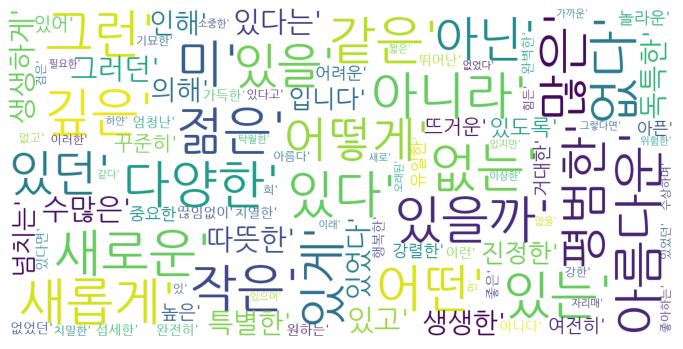

In [30]:
Adjective_count = Adjective_count_df['count']
Adjective_most = list(Adjective_count_df['word'])
    
show_wordcloud(Adjective_most)

In [31]:
# print(list(Adjective_count_df.word[:100]))
stopwords.update(('있는', '있다', '없는', '같은', '어떤', '많은', '아니라', '없다', '있을까', '미', '어떻게', '아닌', '있던',
                  '있을', '있게', '그러던', '있다는', '있고', '있었다', '의해', '인해', '입니다', '있도록', '있어','아니다', '없었던', 
                  '이런', '있다면', '있', '이러한', '있었던', '없고', '있다고', '그렇다면', '있으며', '있지만',
                 '없을', '없었다',  '같다', '이래', '아닐', '그런'))

### 동사 자세하게 살펴보기

In [32]:
Verb_count_df = pd.DataFrame(Verb.value_counts('word'))
Verb_count_df.reset_index(inplace=True)
Verb_count_df.rename({0:'count'}, axis=1, inplace=True)
Verb_count_df.head(5)

,word,count
0,하는,1299
1,된,817
2,한,693
3,한다,682
4,할,513


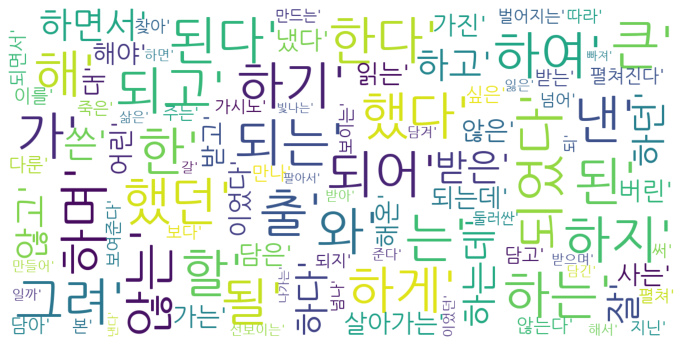

In [33]:
Verb_count = Verb_count_df['count']
Verb_most = list(Verb_count_df['word'])
    
show_wordcloud(Verb_most)

## 전처리

In [34]:
# print(list(Verb_count_df.word[100:200]))
stopwords.update(('하는', '된', '한', '한다', '할', '출', '해', '된다', '는', '하며', '했다', '되는', '하게', '되었다', 
                  '되어', '가', '했던', '될', '하여', '그려', '낸', '되고', '하지', '하기', '와', '않는', '하면서', 
                  '하다', '잘', '하고', '하는데', '쓴', '않고', '하던', '되는데', '않은', '담은', 
                  '사는', '가진', '냈다', '대', '받고', '이었다', '해야', '가는', '해온', 
                  '싶은', '받는', '이를', '않는다', '만나', '담아', '되면서', '담고', '다룬', '보여준다', '따라', 
                  '보다',  '되지', '주는', '본', '찾아', '써', '넘어', 
                  '넘나', '되', '선보이는', '준다', '해서', '일까', '만들어', '이었던', '받아', '받으며', 
                  '담긴', '담겨', '갈', '하면', '나가는', '빠져', '낸다', '였다', '였던', '지', '이어', '드는' , '않았다',
                  '발간', '문학', '현대문학',))

In [35]:
print(stopwords)

{'하게', '그것', '되', '선보이는', '해서', '빠져', '있으며', '문학상', '소설가', '작품', '하는데', '온', '있었다', '로부터', '이제', '가는', '뒤', '하기', '받아', '되지', '도', '있을', '된', '과', '우리', '따라', '하며', '했던', '앞', '받는', '되면서', '통해', '부', '해', '본', '일까', '그러던', '못', '있고', '또', '하면', '없는', '없었던', '발간', '한다', '번', '있게', '해야', '나가는', '이어', '잘', '문장', '이자', '국문학', '있을까', '더욱', '대한', '되는', '미', '관', '준다', '된다', '듯', '점', '중', '권', '네', '와', '낸', '이런', '무엇', '하는', '냈다', '연재', '다섯', '입니다', '받으며', '로', '동안', '갈', '두', '세', '현대문학', '수', '그려', '찾아', '출', '되는데', '모든', '있도록', '했다', '않은', '하면서', '없을', '있지만', '내', '최고', '사는', '이번', '가지', '되고', '한', '속', '개정판', '다른', '될', '가장', '이후', '할', '베스트셀러', '은', '는', '이었던', '선정', '이', '없었다', '알', '어떻게', '담아', '담겨', '안', '단편소설', '년', '없고', '담고', '후', '하던', '수상작', '또한', '그', '간', '있는', '만나', '않는다', '게', '위해', '인물', '채', '있다고', '문학', '만들어', '많은', '대해', '감', '이래', '이러한', '싶은', '써', '번역', '전', '시리즈', '않는', '호', '보다', '것', '같은', '독자', '담긴', '전집', '곳', '넘나', '때문', '있다면', '등', '거', '이야기', '그렇다면', '담은', '작가

In [34]:
story = df['story']
review = df['review']
review = review.fillna('')

# story와 review 데이터 형태소 분리 작업
stopwords = set()

stopwords.update(('하는', '된', '한', '한다', '할', '출', '해', '된다', '는', '하며', '했다', '되는', '하게', '되었다', 
                  '되어', '가', '했던', '될', '하여', '그려', '낸', '되고', '하지', '하기', '와', '않는', '하면서', 
                  '하다', '잘', '하고', '하는데', '쓴', '않고', '하던', '되는데', '않은', '담은', 
                  '사는', '가진', '냈다', '대', '받고', '이었다', '해야', '가는', '해온', 
                  '싶은', '받는', '이를', '않는다', '만나', '담아', '되면서', '담고', '다룬', '보여준다', '따라', 
                  '보다',  '되지', '주는', '본', '찾아', '써', '넘어', 
                  '넘나', '되', '선보이는', '준다', '해서', '일까', '만들어', '이었던', '받아', '받으며', 
                  '담긴', '담겨', '갈', '하면', '나가는', '빠져', '낸다', '였다', '였던', '지', '이어', '드는' , '않았다',
                  '발간', '문학', '현대문학',))

necessary_type = ('Noun', 'Verb', 'Adjective')

sep_story = []

for s in story:
    okt = Okt()
    story_sep = okt.pos(s)
    sentence = ''
    for word,typ in story_sep:
        if (word not in stopwords) and (typ in necessary_type):
            sentence += word + ' '
    sep_story.append(sentence)

sep_review = []

for r in review:
    okt = Okt()
    review_sep = okt.pos(r)
    sentence = ''
    for word,typ in review_sep:
        if (word not in stopwords) and (typ in necessary_type):
            sentence += word + ' '
    sep_review.append(sentence)

analysis_data = [s+r for s,r in zip(sep_story, sep_review)]

In [35]:
df

,id,itemId,title,pubDate,coverSmallUrl,coverLargeUrl,publisher,priceStandard,customerReviewRank,author,isbn,link,story,review,piece,modification_time,insertion_time,analysis_data
0,1,349572433,주술회전 1: 떠나가는 여름과 돌아오는 가을,20210525,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,서울미디어코믹스(서울문화사),7800,0.0,Gege Akutami(아쿠타미 제제),9791136734518,http://book.interpark.com/blog/integration/pro...,"대인기 다크 액션 판타지, 「주술회전」소설 1권 발행!!이타도리와 후시구로의 아키하...",NaN,NaN,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z,인기 다크 액션 판타지 주술 회전 소설 권 발행 도리 후시 구로 아키하바라 산책 고...
1,2,348109712,흐르는 강물처럼(40주년 기념판),20210415,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,연암서가,15000,0.0,노먼 매클린,9791160870763,http://book.interpark.com/blog/integration/pro...,영화 〈흐르는 강물처럼〉의 원작소설영화보다 더한 감동이 굽이쳐 흐른다! 〈흐르는 강...,NaN,나는 1981년 몬태나 주를 방문하던 중에 내 친구 토머스 맥구언과 함께 미국 서부...,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z,영화 흐르는 강물 의 소설 영화 더한 감동 굽이쳐 흐른다 흐르는 강물 의 감독 로버...
2,3,340692027,백작가의 비밀스런 시녀님 세트,20201027,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,필프리미엄에디션,38000,8.0,백주아,9791165655778,http://book.interpark.com/blog/integration/pro...,백주아 장편소설 『백작가의 비밀스런 시녀님 세트』. 가난한 소작농의 딸 폴라. 우연...,〈1권〉가난한 소작농의 딸 폴라.우연한 계기로 명망 높은 벨루니타 백작가의 사용인으...,NaN,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z,백주 장편소설 작가 비밀스런 녀 세트 가난한 소작농 딸 폴라 우연 계기 명망 높은 ...
3,4,343464716,신세계에서 2,20201125,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,해냄출판사,18000,9.9,기시 유스케(貴志祐介),9788965740322,http://book.interpark.com/blog/integration/pro...,일본 SF대상 수상작 & 서점대상 제6위미래의 가상세계에 빗대어 현 인류의 모순을 ...,"순백의 아이들이 평화롭게 살아가는 머나먼 미래, 그 아름다운 유토피아에 가려진 잔혹...",X. 얼굴 없는 소년. 누구보다 사랑했던 소년. 그런데 지금은 얼굴도 떠올릴 수 없...,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z,일본 대상 수상작 서점 대상 제 위 미래 가상세계 빗대어 현 인류 모순 전면 드러낸...
4,5,340768143,추리소설가의 살인사건,20201028,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,소미미디어,15800,9.5,히가시노 게이고(東野圭吾),9791166111983,http://book.interpark.com/blog/integration/pro...,"추리 소설가, 편집자, 독자가 등장하는 추리소설,히가시노 게이고만이 쓸 수 있는 색...","이 작품집, 꽤나 웃기다! 한 번 읽기 시작했다면 멈출 수 없다! 올해의 페이지 터...",그것은 하마사키 회계사무소에서 온 서류였다. 소장인 하마사키 고로는 내 고등학교 동...,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z,추리 소설가 편집자 독자 등장 추리소설 가시노 게이고 쓸 수 있는 색다른 블랙 코미...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,1114,345966624,어니언 마말레이드 2,20210121,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,동아,12800,0.0,백서하,9791163024453,http://book.interpark.com/blog/integration/pro...,"사랑에 빠진 위그의 뒤통수를 치고,이디에트 가문의 약점을 손에 쥐게 된 비비안. “...",NaN,“상속법 관련 문제에 대해 의견을 묻고 싶네.”“죄송하지만 그 부분에 대해서는 귀족...,2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z,사랑 빠진 위 의 뒤통수 디 트 가문 약점 손 쥐 비비안 전략 사랑 순수하게 날 사...
1065,1115,343789806,갑의 품격 1,20201130,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,가연,14500,0.0,김나든,9788968970818,http://book.interpark.com/blog/integration/pro...,"네이버 시리즈 다운로드 수 84만, 실시간 랭킹 1위.혜성처럼 나타난 김나든 작가의...","서울의 끝자락 판자촌 태생, 부모가 누군지도 모르는 고아. 보육원을 떠돌던 예일은 ...","생전 처음 보는 사람 앞에서 그렇게 예일은 펑펑 울었다. 산발이 된 머리도, 그에게...",2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z,네이버 시리즈 다운로드 수 실시간 랭킹 위 혜성 나타난 김나든 작가 유쾌하면서 감동...
1066,1116,342291271,진실에 갇힌 남자,20201109,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/partner/goods_ima...,북로드,14800,9.5,데이비드 발다치,9791158791490,http://book.interpark.com/blog/integration/pro...,“진실이 늘 우리를 자유롭게 하는 것은 아니에요.때론 우리를 가두는 감옥이 될 수도...,"죽음을 눈앞에 두고 자신의 무죄를 주장하던 남자, 이미 죽은 것이나 다름없는 그가 ...","데커는 언젠가 땅 밑에 누워 있는 가족에게 자신도 합류하게 될 그날까지, 매년 몰리...",2022-05-02T01:29:18.000Z,2022-05-02T01:29:19.000Z,진실 늘 우리 자유롭게 것 아니에요 때론 우리 가두는 감옥 수도 있죠 아마존 베스트...
1067,1117,342332559,검사 김서진 4,20201008,https://bimage.interpark.com/partner/goods_ima...,https://bimage.interpark.com/part